In [1]:
from google.colab import files
uploaded = files.upload()


Saving diamonds.csv to diamonds.csv


In [2]:
import pandas as pd
data = pd.read_csv("diamonds.csv")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
print("\nMissing values per column:")
print(data.isnull().sum())



Missing values per column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [4]:
print((data[['x', 'y', 'z']] == 0).sum())


x     8
y     7
z    20
dtype: int64


In [5]:
import numpy as np

data[['x', 'y', 'z']] = data[['x', 'y', 'z']].replace(0, np.nan)


In [6]:
print(data[['x', 'y', 'z']].isnull().sum())


x     8
y     7
z    20
dtype: int64


In [7]:
data['x'] = data['x'].fillna(data['x'].median())
data['y'] = data['y'].fillna(data['y'].median())
data['z'] = data['z'].fillna(data['z'].median())


In [8]:
print(data[['x', 'y', 'z']].isnull().sum())


x    0
y    0
z    0
dtype: int64


In [9]:
data = data.drop(['depth', 'table'], axis=1)
print(data.columns)


Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y', 'z'], dtype='object')


In [10]:
data

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


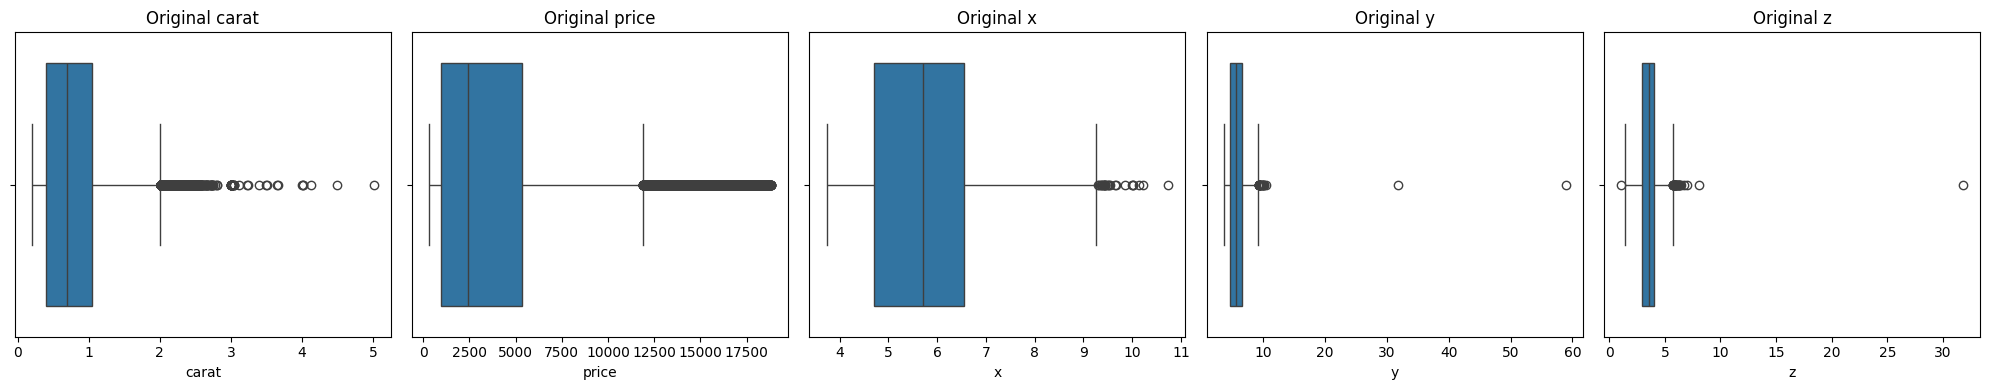

carat - Outliers detected: 1889 (3.50%)
price - Outliers detected: 3540 (6.56%)
x - Outliers detected: 24 (0.04%)
y - Outliers detected: 22 (0.04%)
z - Outliers detected: 29 (0.05%)

Original dataset: 53940 rows
After outlier handling: 53940 rows


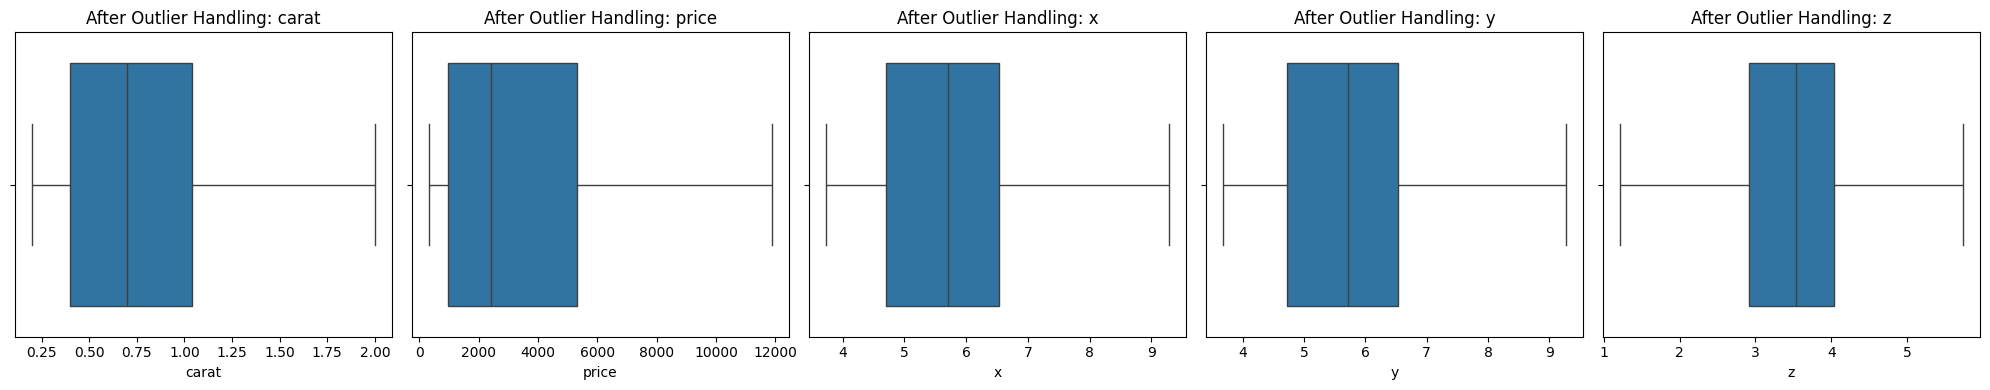


SKEWNESS ANALYSIS

Original Skewness:
carat    0.899893
price    1.148304
x        0.394179
y        0.389861
z        0.387198
dtype: float64

Skewness After Transformation:
price_log     0.031771
carat_sqrt    0.454935
x_boxcox      0.021524
y_boxcox      0.021415
z_boxcox      0.018443
dtype: float64

SUMMARY
Rows: 53940
Columns: 13

Transformed columns created: ['price_log', 'carat_sqrt', 'x_boxcox', 'y_boxcox', 'z_boxcox']
Original columns preserved: ['carat', 'price', 'x', 'y', 'z']


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox


# VISUALIZE ORIGINAL OUTLIERS
numerical_cols = ['carat', 'price', 'x', 'y', 'z']

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for idx, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[idx])
    axes[idx].set_title(f'Original {col}')
plt.tight_layout()
plt.show()


#HANDLE OUTLIERS
data_cleaned = data.copy()

for col in numerical_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers_count = ((data_cleaned[col] < lower) | (data_cleaned[col] > upper)).sum()
    print(f"{col} - Outliers detected: {outliers_count} ({outliers_count/len(data_cleaned)*100:.2f}%)")

    # Cap outliers
    data_cleaned[col] = np.clip(data_cleaned[col], lower, upper)

print(f"\nOriginal dataset: {len(data)} rows")
print(f"After outlier handling: {len(data_cleaned)} rows")


# VISUALIZE AFTER OUTLIER HANDLING
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for idx, col in enumerate(numerical_cols):
    sns.boxplot(x=data_cleaned[col], ax=axes[idx])
    axes[idx].set_title(f'After Outlier Handling: {col}')
plt.tight_layout()
plt.show()


#CHECK SKEWNESS
print("\n" + "="*50)
print("SKEWNESS ANALYSIS")
print("="*50)
skew_original = data_cleaned[numerical_cols].skew()
print("\nOriginal Skewness:")
print(skew_original)


#APPLY TRANSFORMATIONS
data_cleaned['price_log'] = np.log1p(data_cleaned['price'])
data_cleaned['carat_sqrt'] = np.sqrt(data_cleaned['carat'])

# Box-Cox for dimensions
for col in ['x', 'y', 'z']:
    data_cleaned[f'{col}_boxcox'], _ = boxcox(data_cleaned[col] + 1e-6)

# Check transformed skewness
transformed_cols = ['price_log', 'carat_sqrt', 'x_boxcox', 'y_boxcox', 'z_boxcox']
skew_transformed = data_cleaned[transformed_cols].skew()
print("\nSkewness After Transformation:")
print(skew_transformed)


#SUMMARY
print("\n" + "="*50)
print("SUMMARY")
print("="*50)
print(f"Rows: {len(data_cleaned)}")
print(f"Columns: {len(data_cleaned.columns)}")
print(f"\nTransformed columns created: {transformed_cols}")
print(f"Original columns preserved: {numerical_cols}")

Dataset Shape: (53940, 10)

First 5 rows:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  f

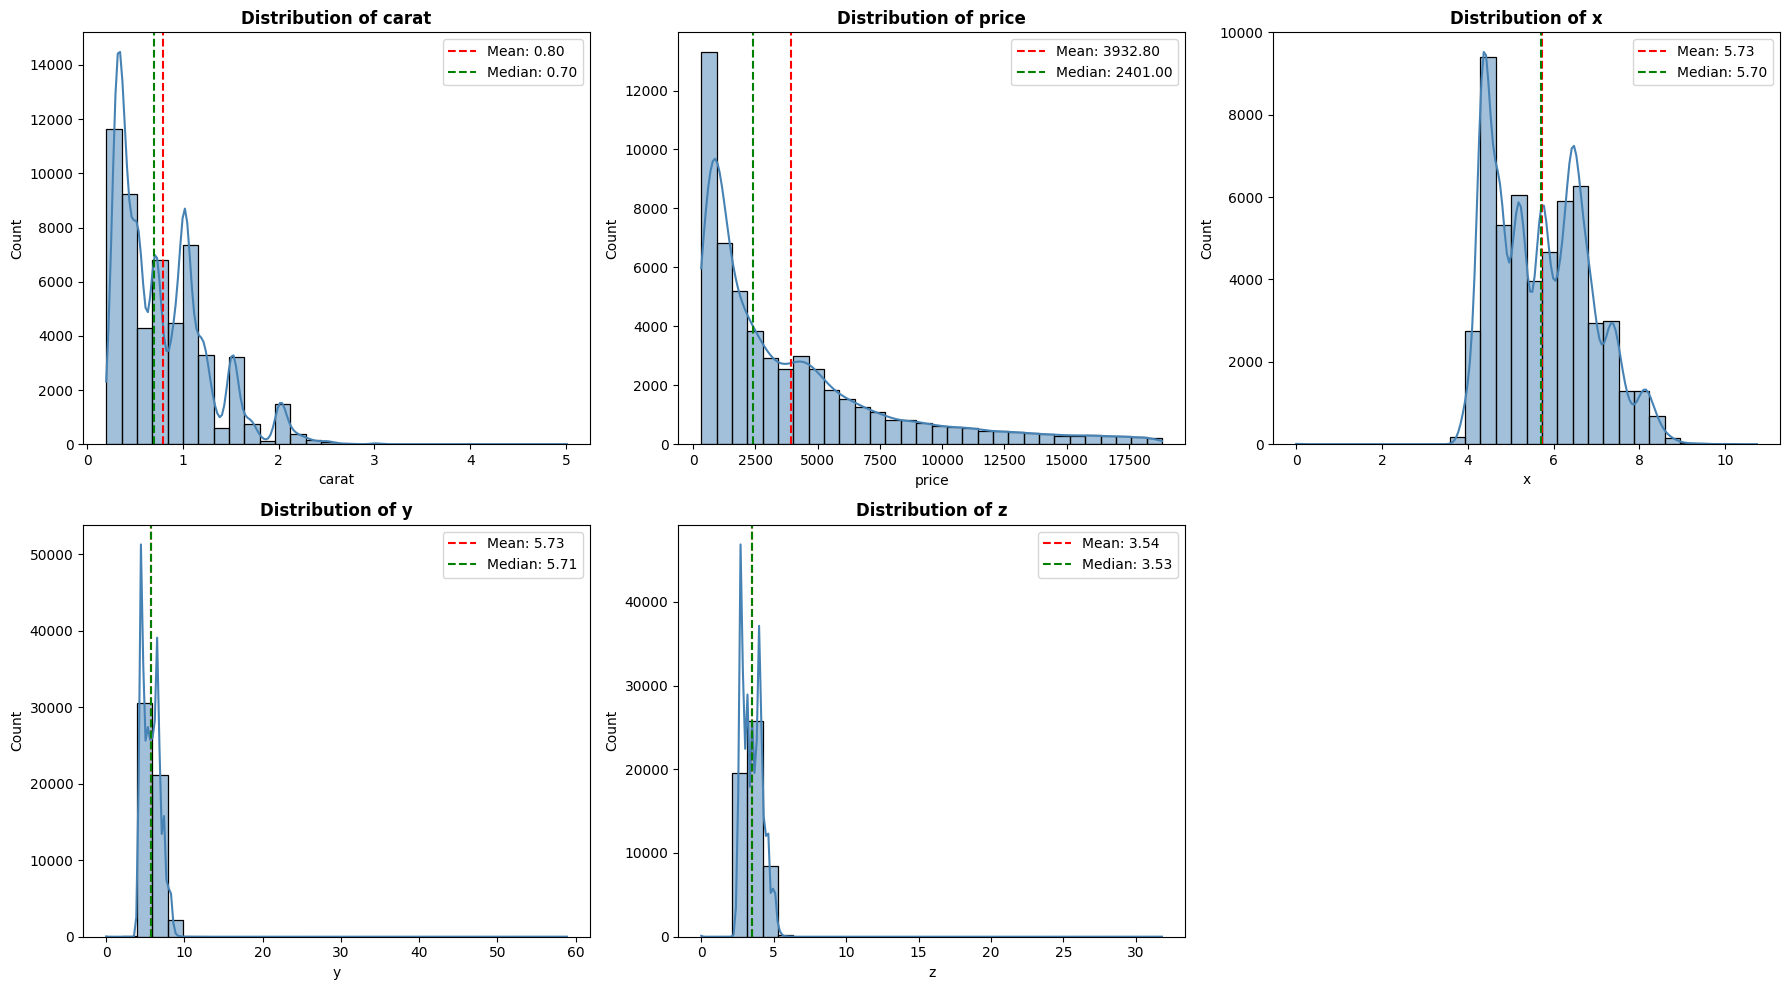


2️⃣ CATEGORICAL FEATURE DISTRIBUTION


/tmp/ipython-input-4292053000.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_eda[col], order=order, ax=axes[idx], palette='Set2')



cut distribution:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


/tmp/ipython-input-4292053000.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_eda[col], order=order, ax=axes[idx], palette='Set2')



color distribution:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64


/tmp/ipython-input-4292053000.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_eda[col], order=order, ax=axes[idx], palette='Set2')



clarity distribution:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


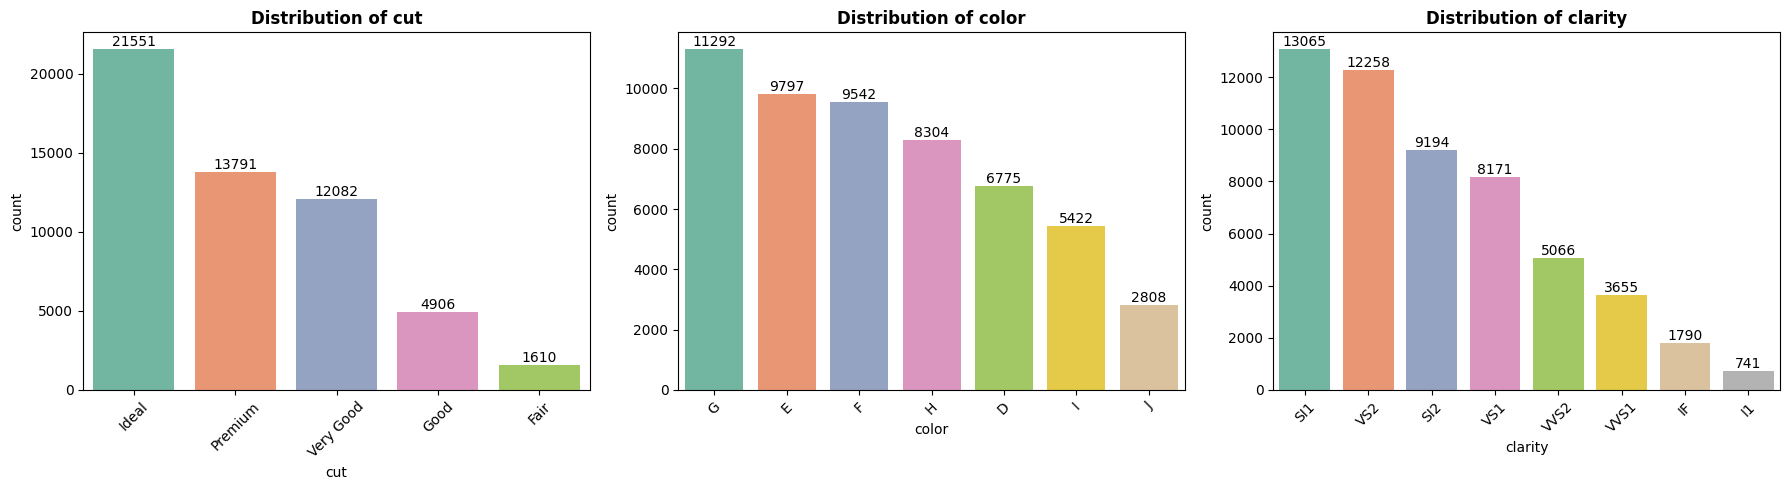


3️⃣ PRICE VARIATION ANALYSIS


/tmp/ipython-input-4292053000.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=data_eda, ax=axes[idx], palette='viridis')



cut - Average Price:
cut
Premium      4584.257704
Fair         4358.757764
Very Good    3981.759891
Good         3928.864452
Ideal        3457.541970
Name: price, dtype: float64


/tmp/ipython-input-4292053000.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=data_eda, ax=axes[idx], palette='viridis')



color - Average Price:
color
J    5323.818020
I    5091.874954
H    4486.669196
G    3999.135671
F    3724.886397
D    3169.954096
E    3076.752475
Name: price, dtype: float64


/tmp/ipython-input-4292053000.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=data_eda, ax=axes[idx], palette='viridis')



clarity - Average Price:
clarity
SI2     5063.028606
SI1     3996.001148
VS2     3924.989395
I1      3924.168691
VS1     3839.455391
VVS2    3283.737071
IF      2864.839106
VVS1    2523.114637
Name: price, dtype: float64


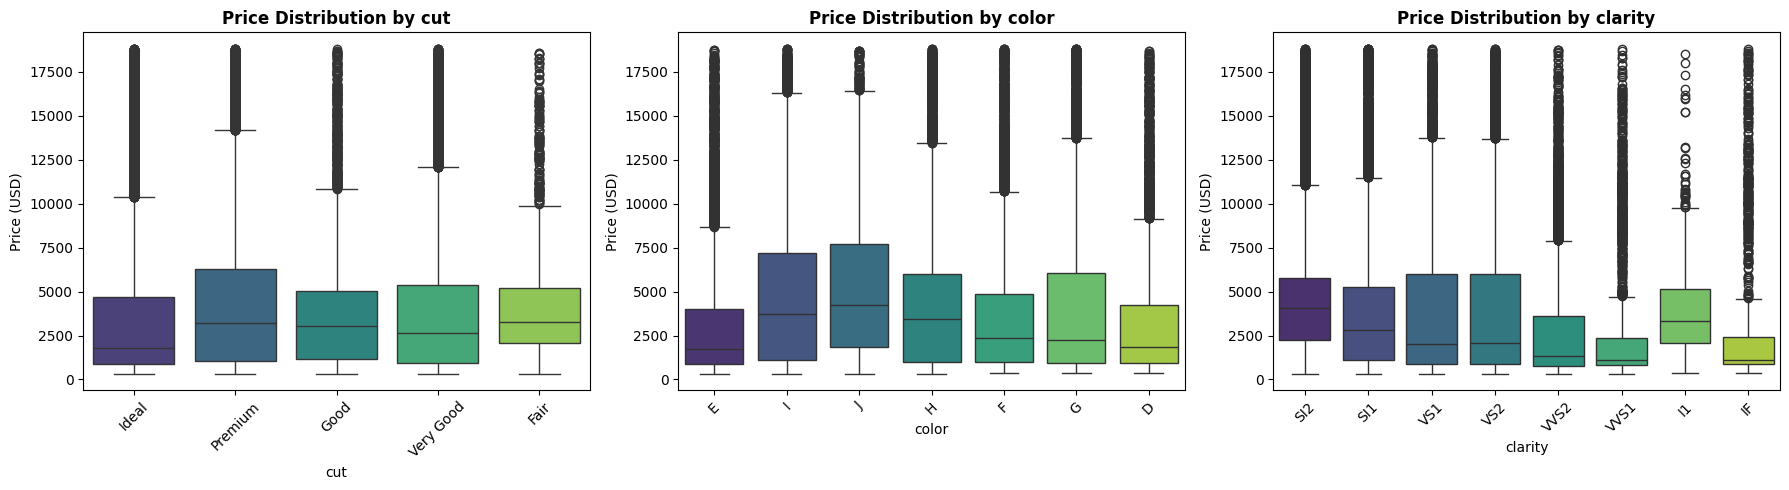


4️⃣ CARAT-BASED PRICE ANALYSIS


/tmp/ipython-input-4292053000.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='carat_bin', y='price', data=data_eda, palette='coolwarm')


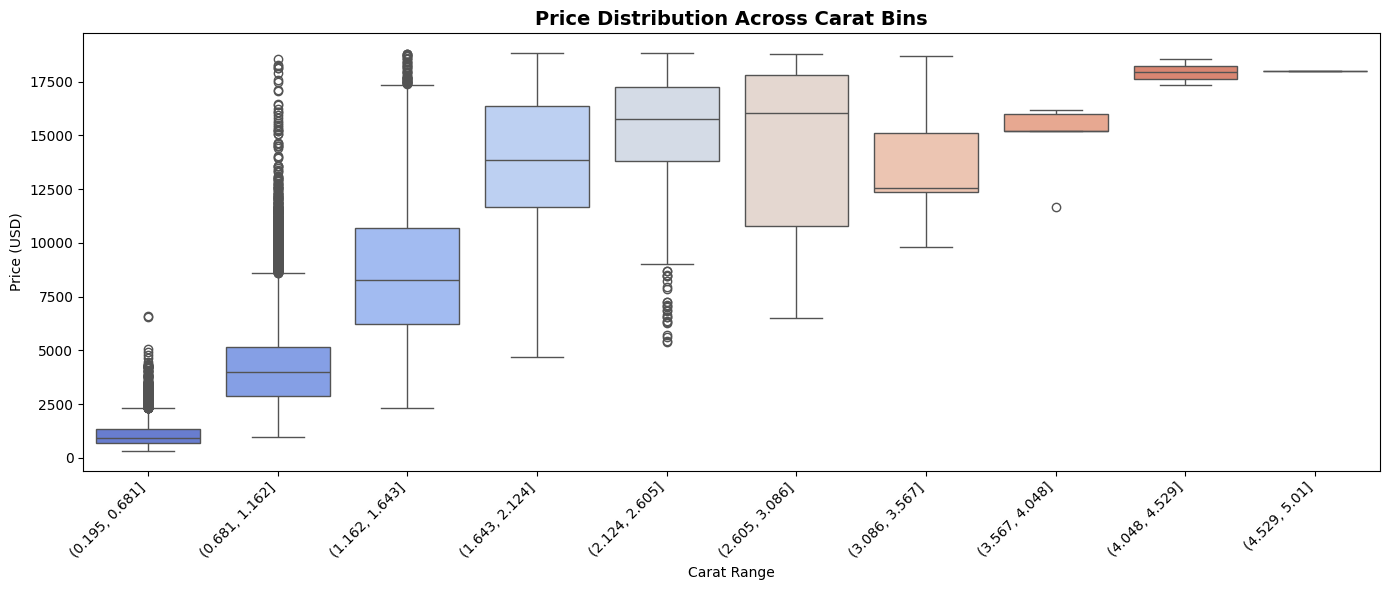


Average price per carat bin:
carat_bin
(0.195, 0.681]     1068.976029
(0.681, 1.162]     4321.345700
(1.162, 1.643]     8710.828868
(1.643, 2.124]    13758.395913
(2.124, 2.605]    15241.128664
(2.605, 3.086]    14521.264151
(3.086, 3.567]    13653.333333
(3.567, 4.048]    14858.200000
(4.048, 4.529]    17930.000000
(4.529, 5.01]     18018.000000
Name: price, dtype: float64

5️⃣ CORRELATION ANALYSIS


/tmp/ipython-input-4292053000.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_eda.groupby('carat_bin')['price'].mean())


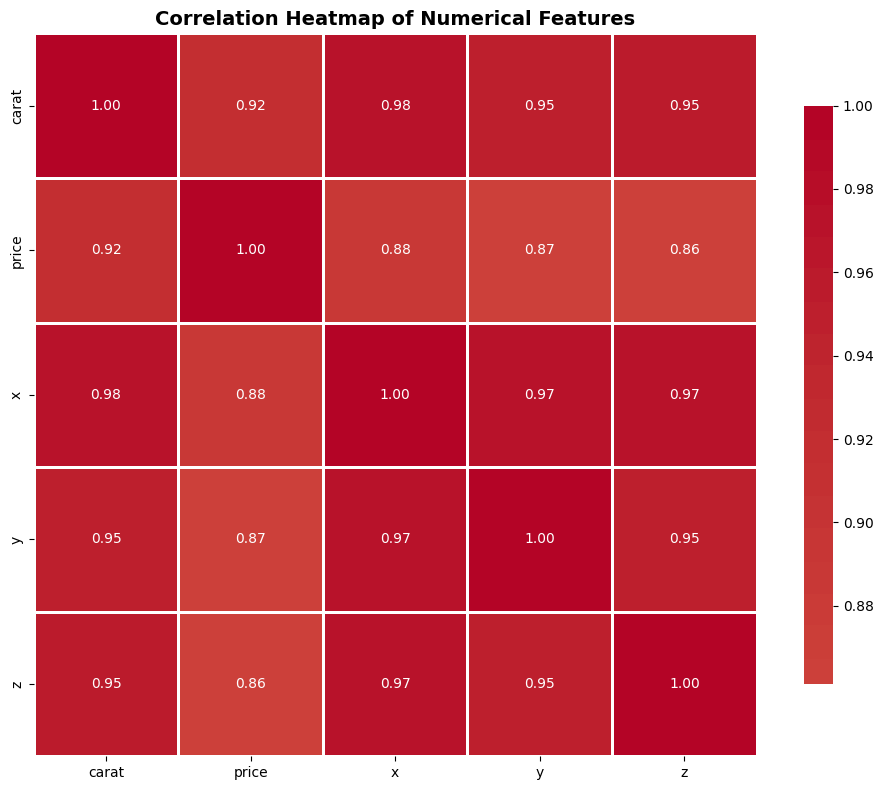


Correlation with Price:
price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

6️⃣ PAIRWISE RELATIONSHIPS


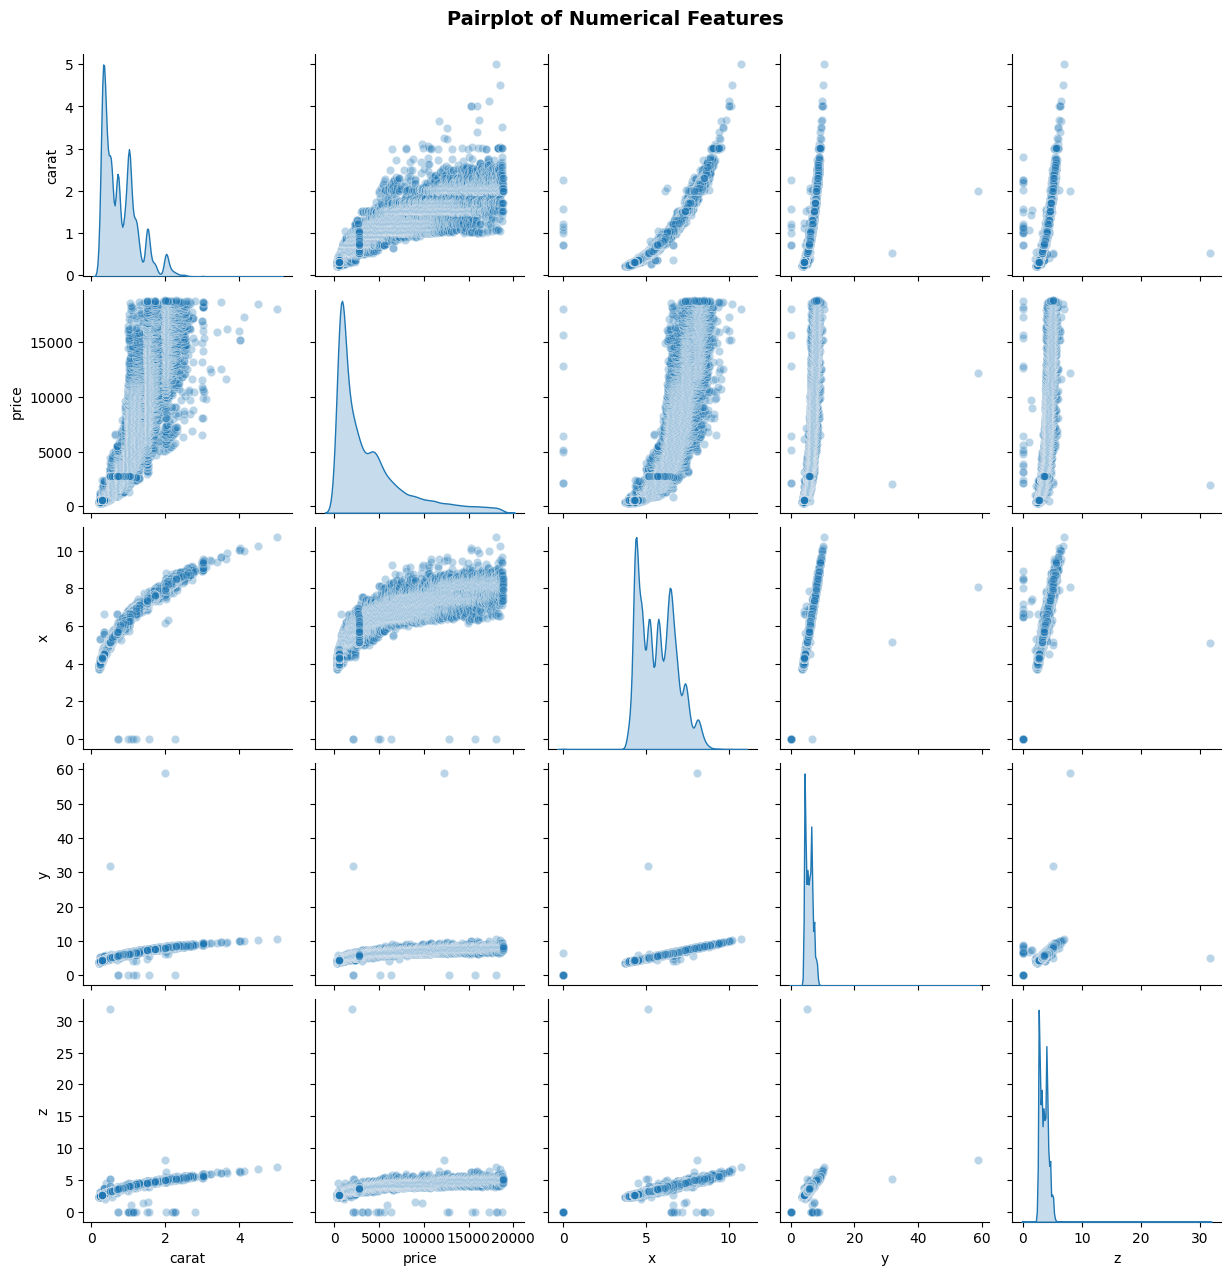

Creating pairplot colored by Cut quality...


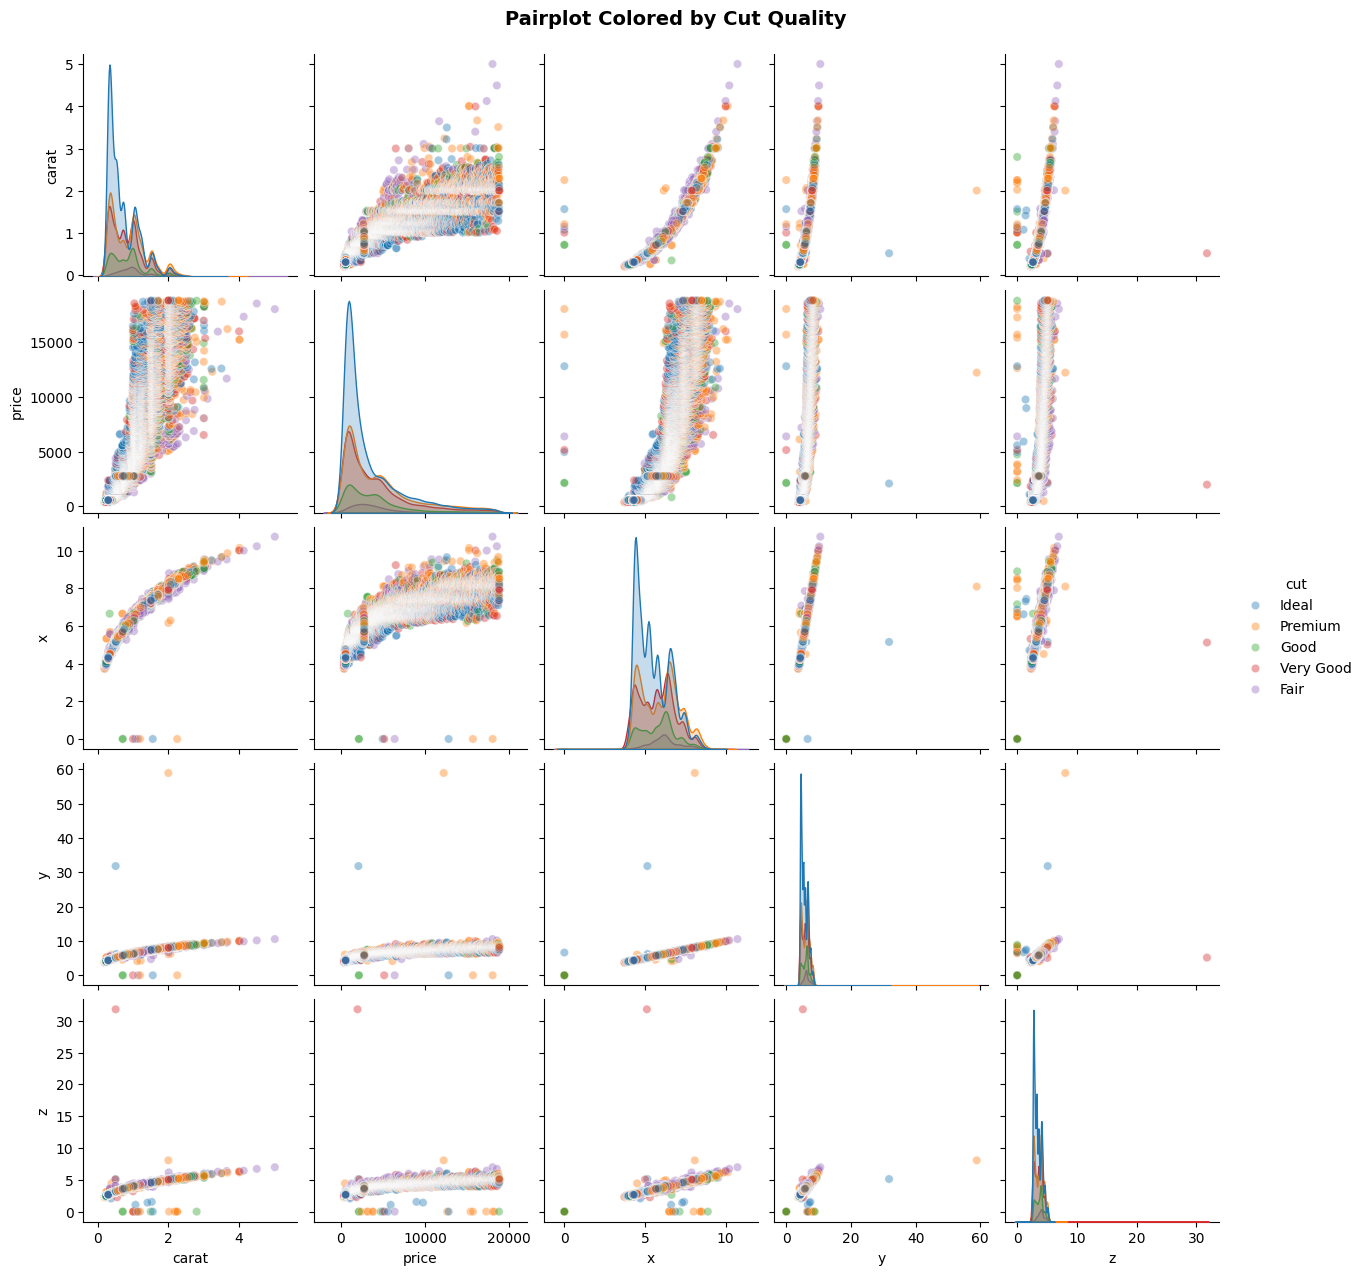


8️⃣ CARAT VS PRICE ANALYSIS


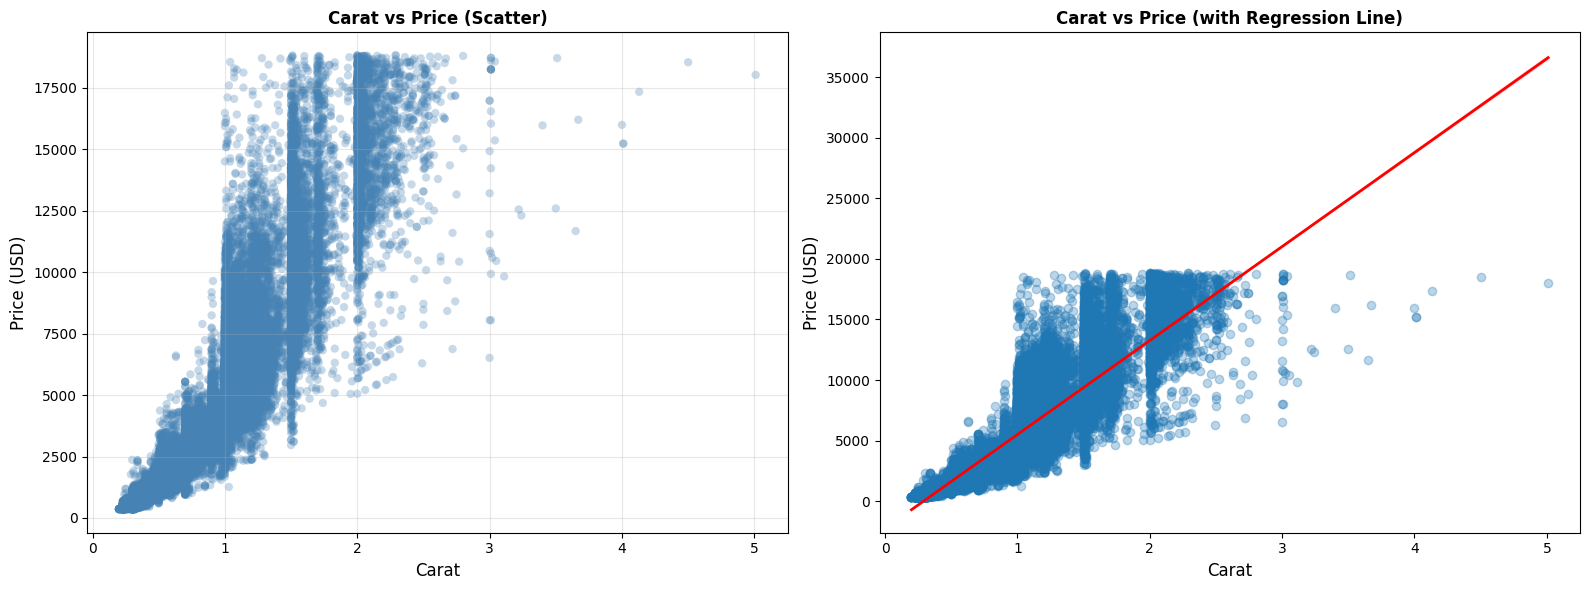


Correlation between Carat and Price: 0.9216

9️⃣ AVERAGE PRICE BY CATEGORY

cut - Ranking by Average Price:
cut
Premium      4584.257704
Fair         4358.757764
Very Good    3981.759891
Good         3928.864452
Ideal        3457.541970
Name: price, dtype: float64

color - Ranking by Average Price:
color
J    5323.818020
I    5091.874954
H    4486.669196
G    3999.135671
F    3724.886397
D    3169.954096
E    3076.752475
Name: price, dtype: float64

clarity - Ranking by Average Price:
clarity
SI2     5063.028606
SI1     3996.001148
VS2     3924.989395
I1      3924.168691
VS1     3839.455391
VVS2    3283.737071
IF      2864.839106
VVS1    2523.114637
Name: price, dtype: float64


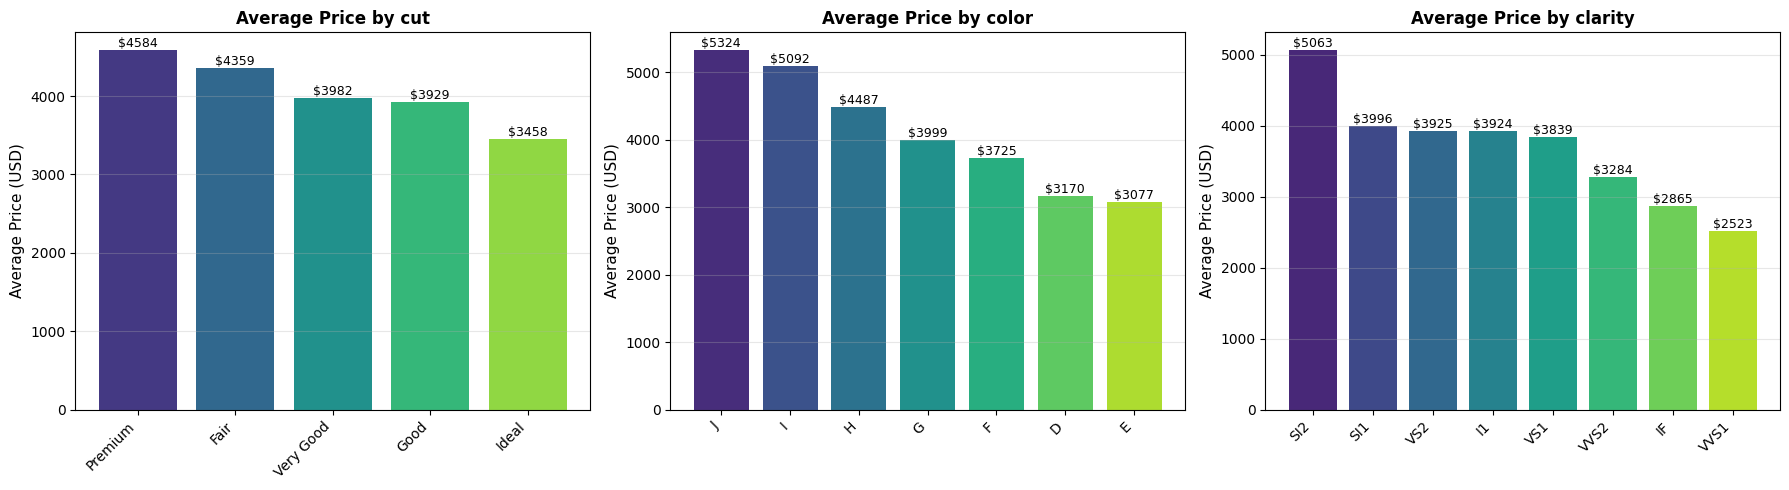


📋 SUMMARY STATISTICS
Total Diamonds: 53,940
Average Price: $3932.80
Median Price: $2401.00
Price Range: $326.00 - $18823.00
Average Carat: 0.798

Most Common Cut: Ideal
Most Common Color: G
Most Common Clarity: SI1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data_eda = pd.read_csv("diamonds.csv")

# Quick data check
print("Dataset Shape:", data_eda.shape)
print("\nFirst 5 rows:")
print(data_eda.head())
print("\nData Info:")
print(data_eda.info())
print("\nStatistical Summary:")
print(data_eda.describe())

#DISTRIBUTION PLOTS
print("\n" + "="*50)
print("1️⃣ DISTRIBUTION ANALYSIS")
print("="*50)

numerical_cols = ['carat', 'price', 'x', 'y', 'z']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data_eda[col], kde=True, bins=30, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].axvline(data_eda[col].mean(), color='red', linestyle='--',
                      label=f'Mean: {data_eda[col].mean():.2f}')
    axes[idx].axvline(data_eda[col].median(), color='green', linestyle='--',
                      label=f'Median: {data_eda[col].median():.2f}')
    axes[idx].legend()

    # Print skewness
    skew = data_eda[col].skew()
    print(f"{col}: Skewness = {skew:.2f}")

axes[-1].axis('off')
plt.tight_layout()
plt.show()

#COUNT PLOTS (Categorical Features)
print("\n" + "="*50)
print("2️⃣ CATEGORICAL FEATURE DISTRIBUTION")
print("="*50)

categorical_cols = ['cut', 'color', 'clarity']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    order = data_eda[col].value_counts().index
    sns.countplot(x=data_eda[col], order=order, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)

    # Add value counts
    for container in axes[idx].containers:
        axes[idx].bar_label(container)

    print(f"\n{col} distribution:")
    print(data_eda[col].value_counts())

plt.tight_layout()
plt.show()


#PRICE VARIATION BY CATEGORICAL FEATURES
print("\n" + "="*50)
print("3️⃣ PRICE VARIATION ANALYSIS")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='price', data=data_eda, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'Price Distribution by {col}', fontsize=12, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylabel('Price (USD)')

    # Print statistics
    print(f"\n{col} - Average Price:")
    print(data_eda.groupby(col)['price'].mean().sort_values(ascending=False))

plt.tight_layout()
plt.show()


#4️⃣PRICE VS CARAT
print("\n" + "="*50)
print("4️⃣ CARAT-BASED PRICE ANALYSIS")
print("="*50)

# Create carat bins
data_eda['carat_bin'] = pd.cut(data_eda['carat'], bins=10)

plt.figure(figsize=(14, 6))
sns.boxplot(x='carat_bin', y='price', data=data_eda, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Carat Bins', fontsize=14, fontweight='bold')
plt.xlabel('Carat Range')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

# Print statistics
print("\nAverage price per carat bin:")
print(data_eda.groupby('carat_bin')['price'].mean())


#CORRELATION HEATMAP

print("\n" + "="*50)
print("5️⃣ CORRELATION ANALYSIS")
print("="*50)

plt.figure(figsize=(10, 8))
correlation_matrix = data_eda[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Price:")
print(correlation_matrix['price'].sort_values(ascending=False))


#PAIRPLOT
print("\n" + "="*50)
print("6️⃣ PAIRWISE RELATIONSHIPS")
print("="*50)

# Basic pairplot
sns.pairplot(data_eda[numerical_cols], diag_kind='kde',
             plot_kws={'alpha': 0.3})
plt.suptitle('Pairplot of Numerical Features', y=1.02,
             fontsize=14, fontweight='bold')
plt.show()


#PAIRPLOT WITH HUE (Cut)
print("Creating pairplot colored by Cut quality...")

sns.pairplot(data_eda, vars=numerical_cols, hue='cut',
             diag_kind='kde', plot_kws={'alpha': 0.4})
plt.suptitle('Pairplot Colored by Cut Quality', y=1.02,
             fontsize=14, fontweight='bold')
plt.show()


#CARAT VS PRICE (Detailed Analysis)
print("\n" + "="*50)
print("8️⃣ CARAT VS PRICE ANALYSIS")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(data_eda['carat'], data_eda['price'],
                alpha=0.3, c='steelblue', edgecolors='none')
axes[0].set_xlabel('Carat', fontsize=12)
axes[0].set_ylabel('Price (USD)', fontsize=12)
axes[0].set_title('Carat vs Price (Scatter)', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Regression line
sns.regplot(x='carat', y='price', data=data_eda,
            scatter_kws={'alpha': 0.3},
            line_kws={'color': 'red', 'linewidth': 2},
            ax=axes[1])
axes[1].set_title('Carat vs Price (with Regression Line)',
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Carat', fontsize=12)
axes[1].set_ylabel('Price (USD)', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate correlation
corr_carat_price = data_eda['carat'].corr(data_eda['price'])
print(f"\nCorrelation between Carat and Price: {corr_carat_price:.4f}")


#AVERAGE PRICE ANALYSIS
print("\n" + "="*50)
print("9️⃣ AVERAGE PRICE BY CATEGORY")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    avg_price = data_eda.groupby(col)['price'].mean().sort_values(ascending=False)

    bars = axes[idx].bar(range(len(avg_price)), avg_price.values,
                         color=sns.color_palette('viridis', len(avg_price)))
    axes[idx].set_xticks(range(len(avg_price)))
    axes[idx].set_xticklabels(avg_price.index, rotation=45, ha='right')
    axes[idx].set_title(f'Average Price by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Average Price (USD)', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'${height:.0f}',
                      ha='center', va='bottom', fontsize=9)

    print(f"\n{col} - Ranking by Average Price:")
    print(avg_price)

plt.tight_layout()
plt.show()

#SUMMARY STATISTICS
print("\n" + "="*50)
print("📋 SUMMARY STATISTICS")
print("="*50)
print(f"Total Diamonds: {len(data_eda):,}")
print(f"Average Price: ${data_eda['price'].mean():.2f}")
print(f"Median Price: ${data_eda['price'].median():.2f}")
print(f"Price Range: ${data_eda['price'].min():.2f} - ${data_eda['price'].max():.2f}")
print(f"Average Carat: {data_eda['carat'].mean():.3f}")
print(f"\nMost Common Cut: {data_eda['cut'].mode()[0]}")
print(f"Most Common Color: {data_eda['color'].mode()[0]}")
print(f"Most Common Clarity: {data_eda['clarity'].mode()[0]}")


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor


#FEATURE ENGINEERING
print("="*60)
print("FEATURE ENGINEERING")
print("="*60)

# 1️⃣ Convert Price to INR
INR_RATE = 83
data['price_inr'] = data['price'] * INR_RATE

# 2️⃣ Volume
data['volume'] = data['x'] * data['y'] * data['z']

# 3️⃣ Price per Carat (will be removed later due to data leakage)
data['price_per_carat'] = data['price_inr'] / data['carat']

# 4️⃣ Dimension Ratio
data['dimension_ratio'] = (data['x'] + data['y']) / (2 * data['z'])

# 5️⃣ Carat Category
def categorize_carat(carat):
    if carat < 0.5:
        return 'Light'
    elif carat <= 1.5:
        return 'Medium'
    else:
        return 'Heavy'

data['carat_category'] = data['carat'].apply(categorize_carat)

print("\n✅ Created Features:")
print("- price_inr")
print("- volume")
print("- price_per_carat")
print("- dimension_ratio")
print("- carat_category")

print("\nSample of new features:")
print(data[['price_inr', 'volume', 'price_per_carat', 'dimension_ratio', 'carat_category']].head())


#FEATURE SELECTION
print("\n" + "="*60)
print("FEATURE SELECTION - Feature Importance Method")
print("="*60)

# For feature selection, temporarily encode categoricals
cut_temp = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_temp = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_temp = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
carat_cat_temp = {'Light': 0, 'Medium': 1, 'Heavy': 2}

# Create temporary encoded columns
data_temp = data.copy()
data_temp['cut_temp'] = data_temp['cut'].map(cut_temp)
data_temp['color_temp'] = data_temp['color'].map(color_temp)
data_temp['clarity_temp'] = data_temp['clarity'].map(clarity_temp)
data_temp['carat_category_temp'] = data_temp['carat_category'].map(carat_cat_temp)

# All available features for selection
all_features = ['carat', 'cut_temp', 'color_temp', 'clarity_temp',
                'x', 'y', 'z', 'volume', 'price_per_carat',
                'dimension_ratio', 'carat_category_temp']

X_temp = data_temp[all_features].copy()
y = data['price_inr'].copy()

# Handle any issues
X_temp = X_temp.replace([np.inf, -np.inf], np.nan)
X_temp = X_temp.fillna(X_temp.median())

print(f"\nTotal features before selection: {len(all_features)}")
print("Features:", all_features)

# Train Random Forest for feature importance
print("\nTraining Random Forest for feature importance...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_temp, y)

# Get feature importance
importances_df = pd.DataFrame({
    'Feature': X_temp.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(importances_df.to_string(index=False))

# Select features with importance > threshold
threshold = 0.01
selected_features_temp = importances_df[importances_df['Importance'] > threshold]['Feature'].tolist()

# Map back to original feature names (remove _temp suffix)
selected_features = []
for feat in selected_features_temp:
    if feat.endswith('_temp'):
        selected_features.append(feat.replace('_temp', ''))
    else:
        selected_features.append(feat)

print(f"\n✅ Selected {len(selected_features)} important features (before removing leakage):")
for feat in selected_features:
    print(f"  - {feat}")


#REMOVE DATA LEAKAGE
print("\n" + "="*60)
print("⚠️ FIXING DATA LEAKAGE")
print("="*60)

# Remove price_per_carat because it contains the target variable (price_inr)
if 'price_per_carat' in selected_features:
    selected_features.remove('price_per_carat')
    print("✅ Removed 'price_per_carat' (contains target variable - data leakage!)")

print(f"\n✅ Selected features after removing leakage: {len(selected_features)}")
print(selected_features)


#ENCODING
print("\n" + "="*60)
print("ENCODING")
print("="*60)

cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

data['cut_encoded'] = data['cut'].map(cut_order)
data['color_encoded'] = data['color'].map(color_order)
data['clarity_encoded'] = data['clarity'].map(clarity_order)

print("✅ Encoded: cut → cut_encoded")
print("✅ Encoded: color → color_encoded")
print("✅ Encoded: clarity → clarity_encoded")

print("\nSample of encoded features:")
print(data[['cut', 'cut_encoded', 'color', 'color_encoded', 'clarity', 'clarity_encoded']].head())

# Encode carat_category if selected
if 'carat_category' in selected_features:
    carat_cat_order = {'Light': 0, 'Medium': 1, 'Heavy': 2}
    data['carat_category_encoded'] = data['carat_category'].map(carat_cat_order)
    print("✅ Encoded: carat_category → carat_category_encoded")


#FINAL FEATURE SET FOR MODELING
print("\n" + "="*60)
print("📋 FINAL FEATURE SET FOR MODELING")
print("="*60)

# Build final feature list with encoded categorical names
final_features = []

for feat in selected_features:
    if feat == 'cut':
        final_features.append('cut_encoded')
    elif feat == 'color':
        final_features.append('color_encoded')
    elif feat == 'clarity':
        final_features.append('clarity_encoded')
    elif feat == 'carat_category':
        final_features.append('carat_category_encoded')
    else:
        final_features.append(feat)

if 'cut_encoded' not in final_features:
    final_features.append('cut_encoded')
    print("⚠️ Added 'cut_encoded' (domain knowledge: important for pricing)")

if 'color_encoded' not in final_features:
    final_features.append('color_encoded')
    print("⚠️ Added 'color_encoded' (domain knowledge: important for pricing)")

if 'clarity_encoded' not in final_features:
    final_features.append('clarity_encoded')
    print("⚠️ Added 'clarity_encoded' (domain knowledge: important for pricing)")

if 'z' not in final_features:
    final_features.append('z')

if 'dimension_ratio' not in final_features:
    final_features.append('dimension_ratio')

print(f"\n✅ FINAL FEATURE SET ({len(final_features)} features):")
for i, feat in enumerate(final_features, 1):
    print(f"  {i}. {feat}")


#SUMMARY
print("\n" + "="*60)
print("📊 SUMMARY")
print("="*60)
print(f"✅ Features engineered: 5 (price_inr, volume, price_per_carat, dimension_ratio, carat_category)")
print(f"✅ Feature selection method: Random Forest Feature Importance")
print(f"✅ Categorical encoding: Ordinal (cut, color, clarity)")
print(f"✅ Final features for modeling: {len(final_features)}")
print(f"✅ Target variable: price_inr")

print("\n" + "="*60)
print("✅ READY FOR MODEL BUILDING")
print("="*60)
print(f"\nUse these features: {final_features}")
print(f"Target: price_inr")
print(f"\nDataset shape: {data.shape}")
print(f"Features available: {len(final_features)}")

# Display final dataset info
print("\n📊 Final Dataset Preview:")
print(data[final_features + ['price_inr']].head())




FEATURE ENGINEERING

✅ Created Features:
- price_inr
- volume
- price_per_carat
- dimension_ratio
- carat_category

Sample of new features:
   price_inr     volume  price_per_carat  dimension_ratio carat_category
0      27058  38.202030    117643.478261         1.631687          Light
1      27058  34.505856    128847.619048         1.673160          Light
2      27141  38.076885    118004.347826         1.757576          Light
3      27722  46.724580     95593.103448         1.602662          Light
4      27805  51.917250     89693.548387         1.580000          Light

FEATURE SELECTION - Feature Importance Method

Total features before selection: 11
Features: ['carat', 'cut_temp', 'color_temp', 'clarity_temp', 'x', 'y', 'z', 'volume', 'price_per_carat', 'dimension_ratio', 'carat_category_temp']

Training Random Forest for feature importance...

Feature Importance Ranking:
            Feature  Importance
    price_per_carat    0.718927
             volume    0.195209
              c

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import pickle


#PREPARE DATA FOR MODELING
print("="*60)
print("📊 PREPARING DATA FOR MODELING")
print("="*60)

final_features = ['volume', 'carat', 'y', 'x', 'cut_encoded',
                  'color_encoded', 'clarity_encoded', 'z', 'dimension_ratio']

X = data[final_features].copy()
y = data['price_inr'].copy()

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeatures used: {final_features}")

# Check for any missing or infinite values
print(f"\nMissing values in X: {X.isnull().sum().sum()}")
print(f"Infinite values in X: {np.isinf(X).sum().sum()}")

# Clean data if needed
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())


# TRAIN-TEST SPLIT
print("\n" + "="*60)
print("🔀 TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


#MODEL BUILDING
print("\n" + "="*60)
print("🤖 BUILDING ML REGRESSION MODELS")
print("="*60)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror', n_jobs=-1),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    print(f"{'='*60}")

    # Train
    model.fit(X_train, y_train)
    print(f"✅ {name} trained successfully")

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_pred_train)

    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred_test)

    # Store results
    results[name] = {
        'model': model,
        'train_mae': train_mae,
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_r2': test_r2
    }

    # Print results with all metrics
    print(f"\n📊 {name} Performance:")
    print(f"{'Metric':<15} {'Train':<20} {'Test':<20}")
    print(f"{'-'*55}")
    print(f"{'MAE':<15} {train_mae:<20.2f} {test_mae:<20.2f}")
    print(f"{'MSE':<15} {train_mse:<20.2f} {test_mse:<20.2f}")
    print(f"{'RMSE':<15} {train_rmse:<20.2f} {test_rmse:<20.2f}")
    print(f"{'R² Score':<15} {train_r2:<20.4f} {test_r2:<20.4f}")


#ANN MODEL BUILDING
print("\n" + "="*60)
print("🧠 BUILDING ANN (ARTIFICIAL NEURAL NETWORK)")
print("="*60)

# Build ANN model
ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("\n📋 ANN Model Architecture:")
ann_model.summary()

# Train ANN
print("\n🏋️ Training ANN Model...")
history = ann_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1
)

print("\n✅ ANN Model trained successfully!")

# Evaluate ANN
y_pred_train_ann = ann_model.predict(X_train, verbose=0).flatten()
y_pred_test_ann = ann_model.predict(X_test, verbose=0).flatten()

ann_train_mae = mean_absolute_error(y_train, y_pred_train_ann)
ann_train_mse = mean_squared_error(y_train, y_pred_train_ann)
ann_train_rmse = np.sqrt(ann_train_mse)
ann_train_r2 = r2_score(y_train, y_pred_train_ann)

ann_test_mae = mean_absolute_error(y_test, y_pred_test_ann)
ann_test_mse = mean_squared_error(y_test, y_pred_test_ann)
ann_test_rmse = np.sqrt(ann_test_mse)
ann_test_r2 = r2_score(y_test, y_pred_test_ann)

# Store ANN results
results['ANN'] = {
    'model': ann_model,
    'train_mae': ann_train_mae,
    'train_mse': ann_train_mse,
    'train_rmse': ann_train_rmse,
    'train_r2': ann_train_r2,
    'test_mae': ann_test_mae,
    'test_mse': ann_test_mse,
    'test_rmse': ann_test_rmse,
    'test_r2': ann_test_r2
}

print(f"\n📊 ANN Performance:")
print(f"{'Metric':<15} {'Train':<20} {'Test':<20}")
print(f"{'-'*55}")
print(f"{'MAE':<15} {ann_train_mae:<20.2f} {ann_test_mae:<20.2f}")
print(f"{'MSE':<15} {ann_train_mse:<20.2f} {ann_test_mse:<20.2f}")
print(f"{'RMSE':<15} {ann_train_rmse:<20.2f} {ann_test_rmse:<20.2f}")
print(f"{'R² Score':<15} {ann_train_r2:<20.4f} {ann_test_r2:<20.4f}")


#COMPLETE MODEL COMPARISON
print("\n" + "="*60)
print("📊 COMPLETE MODEL COMPARISON (ALL METRICS)")
print("="*60)

# Create comprehensive comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train MAE': [results[m]['train_mae'] for m in results.keys()],
    'Train MSE': [results[m]['train_mse'] for m in results.keys()],
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()],
    'Test MSE': [results[m]['test_mse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()]
})

# Sort by Test R² (descending)
comparison_df = comparison_df.sort_values('Test R²', ascending=False)

print("\n📊 All Models Performance Comparison:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"\n{'='*60}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"Test MAE:   {comparison_df.iloc[0]['Test MAE']:.2f} INR")
print(f"Test MSE:   {comparison_df.iloc[0]['Test MSE']:.2f} INR²")
print(f"Test RMSE:  {comparison_df.iloc[0]['Test RMSE']:.2f} INR")
print(f"Test R²:    {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"{'='*60}")


#PERFORMANCE SUMMARY
print("\n" + "="*60)
print("📈 PERFORMANCE SUMMARY")
print("="*60)

print("\n🥇 Top 3 Models by R² Score:")
for i in range(min(3, len(comparison_df))):
    row = comparison_df.iloc[i]
    print(f"{i+1}. {row['Model']:<20} - R²: {row['Test R²']:.4f}, RMSE: {row['Test RMSE']:.2f}")

print("\n🎯 Model Rankings by Different Metrics:")
print(f"\nLowest Test MAE:  {comparison_df.loc[comparison_df['Test MAE'].idxmin(), 'Model']}")
print(f"Lowest Test MSE:  {comparison_df.loc[comparison_df['Test MSE'].idxmin(), 'Model']}")
print(f"Lowest Test RMSE: {comparison_df.loc[comparison_df['Test RMSE'].idxmin(), 'Model']}")
print(f"Highest Test R²:  {comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Model']}")


#SAVE BEST MODEL
print("\n" + "="*60)
print("💾 SAVING BEST MODEL")
print("="*60)

# Save the best model
if best_model_name == 'ANN':
    # Save ANN model
    best_model.save('best_model_ann.h5')
    print(f"✅ Saved ANN model as 'best_model_ann.h5'")
else:
    # Save sklearn model
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"✅ Saved {best_model_name} as 'best_model.pkl'")

# Also save feature names for later use in Streamlit
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(final_features, f)
print("✅ Saved feature names as 'feature_names.pkl'")

# Save all results for reference
with open('all_model_results.pkl', 'wb') as f:
    pickle.dump(results, f)
print("✅ Saved all model results as 'all_model_results.pkl'")

print("\n" + "="*60)
print("✅ REGRESSION MODEL BUILDING COMPLETE!")
print("="*60)
print(f"\n📊 Summary:")
print(f"   - Models trained: {len(results)}")
print(f"   - Best model: {best_model_name}")
print(f"   - Best R² score: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"   - Features used: {len(final_features)}")



📊 PREPARING DATA FOR MODELING
Features (X) shape: (53940, 9)
Target (y) shape: (53940,)

Features used: ['volume', 'carat', 'y', 'x', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'z', 'dimension_ratio']

Missing values in X: 0
Infinite values in X: 0

🔀 TRAIN-TEST SPLIT
X_train shape: (43152, 9)
X_test shape: (10788, 9)
y_train shape: (43152,)
y_test shape: (10788,)

🤖 BUILDING ML REGRESSION MODELS

Training Linear Regression...
✅ Linear Regression trained successfully

📊 Linear Regression Performance:
Metric          Train                Test                
-------------------------------------------------------
MAE             66616.53             66528.04            
MSE             10163988632.88       10308949877.03      
RMSE            100816.61            101533.00           
R² Score        0.9073               0.9059              

Training Decision Tree...
✅ Decision Tree trained successfully

📊 Decision Tree Performance:
Metric          Train                Test     

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)


🏋️ Training ANN Model...
Epoch 1/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 170910023680.0000 - mae: 275559.4062 - val_loss: 28919463936.0000 - val_mae: 140729.6250
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28839518208.0000 - mae: 135287.2812 - val_loss: 25324109824.0000 - val_mae: 121556.4688
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27155357696.0000 - mae: 119072.0781 - val_loss: 22376353792.0000 - val_mae: 113012.3125
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25892315136.0000 - mae: 107271.0625 - val_loss: 20516808704.0000 - val_mae: 102277.3203
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23609993216.0000 - mae: 98448.6953 - val_loss: 19411634176.0000 - val_mae: 95204.1250
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 43056668672.0000 - mae: 93452.5703 - val_loss: 18474436608.0000 - val_mae: 90579.3984
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22783524864.0000 - mae: 89227

📊 PREPARING DATA FOR CLUSTERING
Clustering data shape: (53940, 9)
Features for clustering: ['carat', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'x', 'y', 'z', 'volume', 'dimension_ratio']

Missing values: 0
Infinite values: 0

✅ Data prepared for clustering

📏 FEATURE SCALING (Standardization)
Scaled data shape: (53940, 9)
✅ Features standardized

🔍 ELBOW METHOD - Finding Optimal Number of Clusters

Testing K values from 2 to 10...
K=2 - Inertia: 289449.63, Silhouette Score: 0.3646
K=3 - Inertia: 243882.21, Silhouette Score: 0.2856
K=4 - Inertia: 223001.58, Silhouette Score: 0.2852
K=5 - Inertia: 202197.45, Silhouette Score: 0.2111
K=6 - Inertia: 188766.75, Silhouette Score: 0.2278
K=7 - Inertia: 170842.84, Silhouette Score: 0.1924
K=8 - Inertia: 159785.43, Silhouette Score: 0.1947
K=9 - Inertia: 151718.27, Silhouette Score: 0.1918
K=10 - Inertia: 144396.66, Silhouette Score: 0.1886


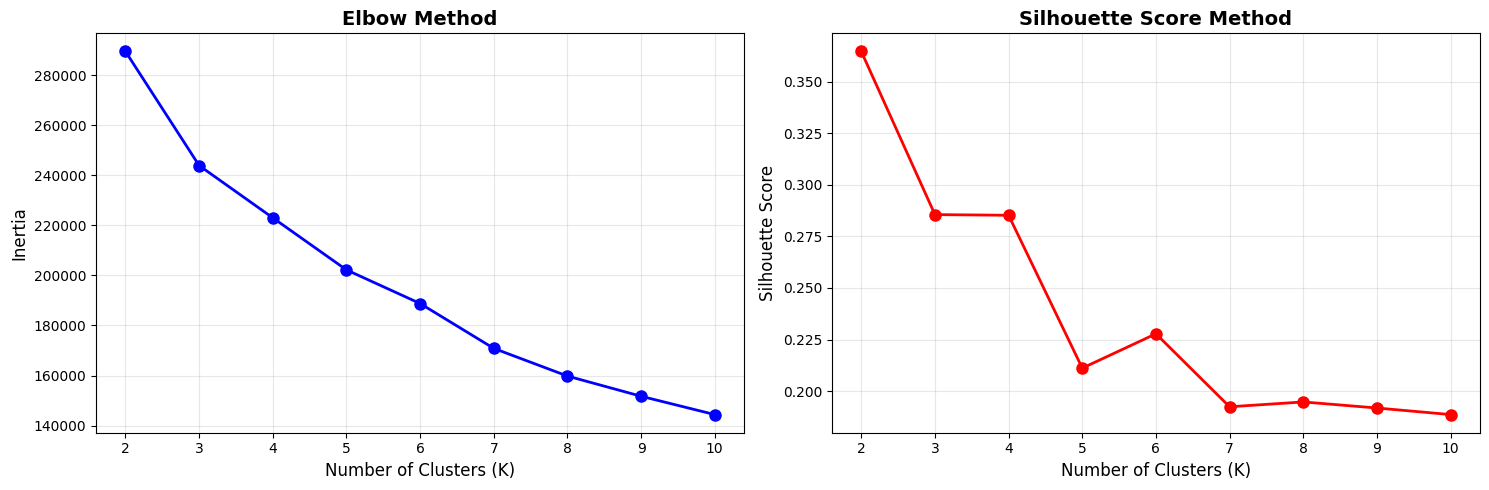


✅ Using K=3 clusters (optimal based on Silhouette Score)

🎯 K-MEANS CLUSTERING (K=3)
✅ K-Means clustering completed
Number of clusters: 3

Cluster distribution:
cluster
0    21158
1    25030
2     7752
Name: count, dtype: int64

📊 Clustering Metrics:
Inertia: 243882.21
Silhouette Score: 0.2856

📊 CLUSTER ANALYSIS

📊 Cluster Statistics:
         price_inr                            carat        cut_encoded  \
              mean    median     min      max  mean median        mean   
cluster                                                                  
0        383888.96  350550.5   38844  1552100  0.94   1.00        2.67   
1         91105.75   75281.0   27058   809416  0.40   0.38        3.15   
2        929376.08  918519.5  163510  1562309  1.68   1.54        2.75   

        color_encoded clarity_encoded  volume  
                 mean            mean    mean  
cluster                                        
0                3.39            2.52  152.81  
1                3.80   

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle


#PREPARE DATA FOR CLUSTERING
print("="*60)
print("📊 PREPARING DATA FOR CLUSTERING")
print("="*60)

clustering_features = ['carat', 'cut_encoded', 'color_encoded', 'clarity_encoded',
                       'x', 'y', 'z', 'volume', 'dimension_ratio']

X_cluster = data[clustering_features].copy()

print(f"Clustering data shape: {X_cluster.shape}")
print(f"Features for clustering: {clustering_features}")

print(f"\nMissing values: {X_cluster.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(X_cluster).sum().sum()}")

X_cluster = X_cluster.replace([np.inf, -np.inf], np.nan)
X_cluster = X_cluster.fillna(X_cluster.median())

print("\n✅ Data prepared for clustering")


#FEATURE SCALING
print("\n" + "="*60)
print("📏 FEATURE SCALING (Standardization)")
print("="*60)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"Scaled data shape: {X_scaled.shape}")
print("✅ Features standardized")

#ELBOW METHOD
print("\n" + "="*60)
print("🔍 ELBOW METHOD - Finding Optimal Number of Clusters")
print("="*60)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("\nTesting K values from 2 to 10...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, kmeans.labels_)

    inertias.append(inertia)
    silhouette_scores.append(silhouette)

    print(f"K={k} - Inertia: {inertia:.2f}, Silhouette Score: {silhouette:.4f}")

# Plot Elbow Curve
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score Method', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


# USE K=3
optimal_k = 3
print(f"\n✅ Using K={optimal_k} clusters (optimal based on Silhouette Score)")

#K-MEANS CLUSTERING
print("\n" + "="*60)
print(f"🎯 K-MEANS CLUSTERING (K={optimal_k})")
print("="*60)

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

data['cluster'] = cluster_labels

print(f"✅ K-Means clustering completed")
print(f"Number of clusters: {optimal_k}")
print(f"\nCluster distribution:")
print(data['cluster'].value_counts().sort_index())

final_inertia = kmeans_final.inertia_
final_silhouette = silhouette_score(X_scaled, cluster_labels)

print(f"\n📊 Clustering Metrics:")
print(f"Inertia: {final_inertia:.2f}")
print(f"Silhouette Score: {final_silhouette:.4f}")


#CLUSTER ANALYSIS
print("\n" + "="*60)
print("📊 CLUSTER ANALYSIS")
print("="*60)

cluster_analysis = data.groupby('cluster').agg({
    'price_inr': ['mean', 'median', 'min', 'max'],
    'carat': ['mean', 'median'],
    'cut_encoded': 'mean',
    'color_encoded': 'mean',
    'clarity_encoded': 'mean',
    'volume': 'mean'
}).round(2)

print("\n📊 Cluster Statistics:")
print(cluster_analysis)

print("\n📊 Diamonds per Cluster:")
for cluster in range(optimal_k):
    count = (data['cluster'] == cluster).sum()
    percentage = (count / len(data)) * 100
    print(f"Cluster {cluster}: {count} diamonds ({percentage:.2f}%)")


#CLUSTER NAMING
print("\n" + "="*60)
print("🏷️ CLUSTER NAMING & LABELING")
print("="*60)

cluster_characteristics = {}

for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]

    avg_price = cluster_data['price_inr'].mean()
    avg_carat = cluster_data['carat'].mean()
    avg_cut = cluster_data['cut_encoded'].mean()
    count = len(cluster_data)

    cluster_characteristics[cluster] = {
        'avg_price': avg_price,
        'avg_carat': avg_carat,
        'avg_cut': avg_cut,
        'count': count
    }

    print(f"\nCluster {cluster}:")
    print(f"  Average Price: ₹{avg_price:,.2f}")
    print(f"  Average Carat: {avg_carat:.3f}")
    print(f"  Average Cut Quality: {avg_cut:.2f}")
    print(f"  Count: {count}")

# Name clusters
def name_cluster(cluster_id):
    """Assign names based on mentor's examples:
    - Premium Heavy Diamonds
    - Affordable Small Diamonds
    - Mid-Range Balanced Diamonds
    """
    char = cluster_characteristics[cluster_id]
    avg_price = char['avg_price']
    avg_carat = char['avg_carat']

    # Naming logic matching
    if avg_price < 150000:
        return "Affordable Small Diamonds"
    elif avg_price < 500000:
        return "Mid-Range Balanced Diamonds"
    else:
        return "Premium Heavy Diamonds"

cluster_names = {}
for cluster in range(optimal_k):
    cluster_names[cluster] = name_cluster(cluster)

data['cluster_name'] = data['cluster'].map(cluster_names)

print("\n" + "="*60)
print("🏷️ CLUSTER NAMES:")
print("="*60)
for cluster, name in cluster_names.items():
    count = (data['cluster'] == cluster).sum()
    avg_price = cluster_characteristics[cluster]['avg_price']
    avg_carat = cluster_characteristics[cluster]['avg_carat']
    print(f"\nCluster {cluster}: {name}")
    print(f"  Count: {count} diamonds")
    print(f"  Avg Price: ₹{avg_price:,.0f}")
    print(f"  Avg Carat: {avg_carat:.3f}")


#SAVE MODELS
print("\n" + "="*60)
print("💾 SAVING CLUSTERING MODEL")
print("="*60)

with open('clustering_model.pkl', 'wb') as f:
    pickle.dump(kmeans_final, f)
print("✅ Saved K-Means model")

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Saved scaler")

with open('cluster_names.pkl', 'wb') as f:
    pickle.dump(cluster_names, f)
print("✅ Saved cluster names")

with open('clustering_features.pkl', 'wb') as f:
    pickle.dump(clustering_features, f)
print("✅ Saved clustering features")

data.to_csv('diamonds_with_clusters.csv', index=False)
print("✅ Saved complete dataset")


#SUMMARY
print("\n" + "="*60)
print("📋 CLUSTERING SUMMARY")
print("="*60)

print(f"\n✅ Clustering Method: K-Means")
print(f"✅ Number of Clusters: {optimal_k}")
print(f"✅ Silhouette Score: {final_silhouette:.4f}")
print(f"✅ Features used: {len(clustering_features)}")

print(f"\n📊 Final Cluster Distribution:")
for cluster in range(optimal_k):
    count = (data['cluster'] == cluster).sum()
    percentage = (count / len(data)) * 100
    avg_price = cluster_characteristics[cluster]['avg_price']
    avg_carat = cluster_characteristics[cluster]['avg_carat']
    print(f"\n{cluster_names[cluster]}:")
    print(f"  Count: {count} ({percentage:.1f}%)")
    print(f"  Avg Price: ₹{avg_price:,.0f}")
    print(f"  Avg Carat: {avg_carat:.3f}")

print("\n" + "="*60)
print("✅ CLUSTERING COMPLETE!")
print("="*60)
print("Cluster names match mentor's suggestions:")
print("  - Premium Heavy Diamonds")
print("  - Affordable Small Diamonds")
print("  - Mid-Range Balanced Diamonds")
print("="*60)

In [17]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.2 MB/s eta 0:00:00


In [18]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Page config
st.set_page_config(page_title="💎 Diamond Price Predictor", page_icon="💎", layout="wide")

# Load models
@st.cache_resource
def load_models():
    with open('best_model.pkl', 'rb') as f:
        regression_model = pickle.load(f)
    with open('clustering_model.pkl', 'rb') as f:
        clustering_model = pickle.load(f)
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    with open('feature_names.pkl', 'rb') as f:
        feature_names = pickle.load(f)
    with open('clustering_features.pkl', 'rb') as f:
        clustering_features = pickle.load(f)
    with open('cluster_names.pkl', 'rb') as f:
        cluster_names = pickle.load(f)
    return regression_model, clustering_model, scaler, feature_names, clustering_features, cluster_names

regression_model, clustering_model, scaler, feature_names, clustering_features, cluster_names = load_models()

# Header
st.title("💎 Diamond Dynamics")
st.markdown("---")

# Tabs
tab1, tab2 = st.tabs(["🔮 Price Prediction", "📊 Market Segment"])


# TAB 1: PRICE PREDICTION
with tab1:
    st.header("🔮 Price Prediction")

    col1, col2 = st.columns(2)

    with col1:
        carat = st.number_input("Carat", 0.2, 5.0, 0.5, 0.01)
        x = st.number_input("Length (mm)", 0.0, 15.0, 5.0, 0.1)
        y = st.number_input("Width (mm)", 0.0, 15.0, 5.0, 0.1)
        z = st.number_input("Depth (mm)", 0.0, 10.0, 3.0, 0.1)

    with col2:
        cut = st.selectbox("Cut", ["Fair", "Good", "Very Good", "Premium", "Ideal"], index=4)
        color = st.selectbox("Color", ["J", "I", "H", "G", "F", "E", "D"], index=3)
        clarity = st.selectbox("Clarity", ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], index=4)

    if st.button("🔮 Predict Price", type="primary", use_container_width=True):
        # Encode
        cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
        color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
        clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

        # Features
        volume = x * y * z
        dimension_ratio = (x + y) / (2 * z) if z > 0 else 0

        features = pd.DataFrame({
            'volume': [volume],
            'carat': [carat],
            'y': [y],
            'x': [x],
            'cut_encoded': [cut_order[cut]],
            'color_encoded': [color_order[color]],
            'clarity_encoded': [clarity_order[clarity]],
            'z': [z],
            'dimension_ratio': [dimension_ratio]
        })[feature_names]

        # Predict
        predicted_price = regression_model.predict(features)[0]

        # Display
        st.success("### Prediction Complete")
        col1, col2, col3 = st.columns([1, 2, 1])
        with col2:
            st.metric("Predicted Price", f"₹ {predicted_price:,.2f}")


# TAB 2: CLUSTER PREDICTION
with tab2:
    st.header("📊 Market Segment")

    col1, col2 = st.columns(2)

    with col1:
        carat_c = st.number_input("Carat ", 0.2, 5.0, 0.5, 0.01, key="c1")
        x_c = st.number_input("Length (mm) ", 0.0, 15.0, 5.0, 0.1, key="c2")
        y_c = st.number_input("Width (mm) ", 0.0, 15.0, 5.0, 0.1, key="c3")
        z_c = st.number_input("Depth (mm) ", 0.0, 10.0, 3.0, 0.1, key="c4")

    with col2:
        cut_c = st.selectbox("Cut ", ["Fair", "Good", "Very Good", "Premium", "Ideal"], index=4, key="c5")
        color_c = st.selectbox("Color ", ["J", "I", "H", "G", "F", "E", "D"], index=3, key="c6")
        clarity_c = st.selectbox("Clarity ", ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], index=4, key="c7")

    if st.button("📊 Predict Segment", type="primary", use_container_width=True):
        # Encode
        cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
        color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
        clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

        # Features
        volume_c = x_c * y_c * z_c
        dimension_ratio_c = (x_c + y_c) / (2 * z_c) if z_c > 0 else 0

        features_c = pd.DataFrame({
            'carat': [carat_c],
            'cut_encoded': [cut_order[cut_c]],
            'color_encoded': [color_order[color_c]],
            'clarity_encoded': [clarity_order[clarity_c]],
            'x': [x_c],
            'y': [y_c],
            'z': [z_c],
            'volume': [volume_c],
            'dimension_ratio': [dimension_ratio_c]
        })[clustering_features]

        # Predict
        scaled = scaler.transform(features_c)
        cluster_id = clustering_model.predict(scaled)[0]
        cluster_name = cluster_names[cluster_id]

        # Display
        st.success("### Segment Identified")
        col1, col2, col3 = st.columns([1, 2, 1])
        with col2:
            st.markdown(f"<h2 style='text-align: center;'>🏷️ {cluster_name}</h2>", unsafe_allow_html=True)
            st.markdown(f"<p style='text-align: center;'>Cluster ID: {cluster_id}</p>", unsafe_allow_html=True)

st.markdown("---")
st.markdown("<p style='text-align: center;'>💎 Diamond Dynamics | ML-Powered Predictions</p>", unsafe_allow_html=True)

Writing app.py


In [19]:
# --- Colab Streamlit + Cloudflared Setup ---

# 1️⃣ Install dependencies
!pip install streamlit pandas requests --quiet

# 2️⃣ Download and install cloudflared
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

# 3️⃣ Kill any old processes
!pkill -f streamlit
!pkill -f cloudflared

# 4️⃣ Run Streamlit app in background and log output
!nohup streamlit run app.py --server.port 8501 --server.headless true > log.txt 2>&1 &

import time
print("⏳ Waiting 10 seconds for Streamlit to start...")
time.sleep(10)

# 5️⃣ Check if Streamlit is running
!tail -n 20 log.txt

# 6️⃣ Start Cloudflared tunnel (after Streamlit is up)
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate


Selecting previously unselected package cloudflared.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.11.1) ...
Setting up cloudflared (2025.11.1) ...
Processing triggers for man-db (2.10.2-1) ...
⏳ Waiting 10 seconds for Streamlit to start...



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.225.124:8501

2025-12-02T07:58:16Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you 

In [ ]:
# Add this to your notebook to verify
test_diamond = {
    'carat': 1.6,
    'cut': 'Ideal',
    'color': 'I',
    'clarity': 'SI2',
    'x': 7.51,
    'y': 7.48,
    'z': 4.64
}

# Find actual price in dataset
actual = data[(data['carat'] == 1.6) &
              (data['cut'] == 'Ideal') &
              (data['color'] == 'I') &
              (data['clarity'] == 'SI2')]['price_inr'].values

print(f"Actual prices: {actual}")



Actual prices: [695291 707990]


In [ ]:
print("="*60)
print("CLUSTER NAME VERIFICATION")
print("="*60)

for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    avg_price = cluster_data['price_inr'].mean()
    avg_carat = cluster_data['carat'].mean()
    count = len(cluster_data)

    print(f"\nCluster {cluster}: {cluster_names[cluster]}")
    print(f"  Average Price: ₹{avg_price:,.2f}")
    print(f"  Average Carat: {avg_carat:.3f}")
    print(f"  Count: {count} diamonds")
    print(f"  Price Range: ₹{cluster_data['price_inr'].min():,.0f} - ₹{cluster_data['price_inr'].max():,.0f}")

CLUSTER NAME VERIFICATION

Cluster 0: Mid-Range Balanced Diamonds
  Average Price: ₹383,888.96
  Average Carat: 0.941
  Count: 21158 diamonds
  Price Range: ₹38,844 - ₹1,552,100

Cluster 1: Affordable Small Diamonds
  Average Price: ₹91,105.75
  Average Carat: 0.404
  Count: 25030 diamonds
  Price Range: ₹27,058 - ₹809,416

Cluster 2: Premium Heavy Diamonds
  Average Price: ₹929,376.08
  Average Carat: 1.678
  Count: 7752 diamonds
  Price Range: ₹163,510 - ₹1,562,309
